# Very Basic Exploratory Data Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%env TP_ISAE_DATA = /home/fchouteau/repositories/tp_isae/data/

env: TP_ISAE_DATA=/home/fchouteau/repositories/tp_isae/data/


In [3]:
import os
import skimage
import pandas as pd
import numpy as np
import skimage.exposure
import skimage.io
import scipy.stats
import tqdm
from matplotlib import pyplot as plt

In [4]:
import khumeia
from khumeia.data.item import SatelliteImage

In [5]:
khumeia.download_train_data()

[2018-11-12 16:23:54,636][tp-isae][get_data][INFO] Downloading training data
[2018-11-12 16:23:54,636][tp-isae][get_data][INFO] Downloading data from tp_isae_train_data.tar.gz to /home/fchouteau/repositories/tp_isae/data/
[2018-11-12 16:23:54,637][tp-isae][get_data][INFO] Extracting tar gz
[2018-11-12 16:23:57,618][tp-isae][get_data][INFO] Done. Your training data is located here /home/fchouteau/repositories/tp_isae/data/raw/trainval


## Use the pandas dataframe to get a quick look at our data

In [6]:
RAW_DATA_DIR = os.path.join(os.environ.get("TP_ISAE_DATA"),"raw")

In [7]:
image_ids = pd.read_csv(os.path.join(RAW_DATA_DIR, "trainval_ids.csv"))

In [8]:
train_labels = pd.read_csv(os.path.join(RAW_DATA_DIR, "trainval_labels.csv"))

In [9]:
# Number of objects / image in train dataset
print(train_labels['image_id'].value_counts())
print(scipy.stats.describe(train_labels['image_id'].value_counts()))

USGS_SJC    212
USGS_EYW    202
USGS_OHR    165
USGS_IAD    141
USGS_IAH    125
USGS_OAK    102
USGS_CLT     88
USGS_SAN     80
USGS_SFO     72
USGS_BWI     70
USGS_AUS     63
USGS_BOS     61
USGS_PHX     58
USGS_SEA     54
USGS_FAT     53
USGS_CVG     42
USGS_MDW     40
USGS_FLL     39
USGS_MIA     35
USGS_ATL     35
USGS_IND     20
USGS_FLG     15
USGS_FWA     14
USGS_BHM     10
USGS_DSM      3
Name: image_id, dtype: int64
DescribeResult(nobs=25, minmax=(3, 212), mean=71.96, variance=3279.1233333333334, skewness=1.1236529929385317, kurtosis=0.43310419030747305)


In [10]:
# Size of different objects
train_labels['size'].describe()

count    1799.000000
mean       39.352418
std        16.611684
min        10.000000
25%        26.000000
50%        40.000000
75%        50.000000
max       102.000000
Name: size, dtype: float64

## Let's start to use our framework now !

In [11]:
TRAINVAL_DATA_DIR = os.path.join(RAW_DATA_DIR, "trainval")

In [12]:
trainval_satellite_images = SatelliteImage.list_items_from_path(TRAINVAL_DATA_DIR)

[2018-11-12 16:23:57,768][tp-isae][item][INFO] Looking in /home/fchouteau/repositories/tp_isae/data/raw/trainval


In [13]:
for satellite_image in trainval_satellite_images:
    print(satellite_image)

--- Item description ---
image_id: USGS_ATL
image_file: /home/fchouteau/repositories/tp_isae/data/raw/trainval/USGS_ATL.jpg
label_file: /home/fchouteau/repositories/tp_isae/data/raw/trainval/USGS_ATL.json
image_shape: (7852, 6689, 3)
number of labels: 35

--- Item description ---
image_id: USGS_AUS
image_file: /home/fchouteau/repositories/tp_isae/data/raw/trainval/USGS_AUS.jpg
label_file: /home/fchouteau/repositories/tp_isae/data/raw/trainval/USGS_AUS.json
image_shape: (7628, 6722, 3)
number of labels: 63

--- Item description ---
image_id: USGS_BHM
image_file: /home/fchouteau/repositories/tp_isae/data/raw/trainval/USGS_BHM.jpg
label_file: /home/fchouteau/repositories/tp_isae/data/raw/trainval/USGS_BHM.json
image_shape: (7544, 6416, 3)
number of labels: 10

--- Item description ---
image_id: USGS_BOS
image_file: /home/fchouteau/repositories/tp_isae/data/raw/trainval/USGS_BOS.jpg
label_file: /home/fchouteau/repositories/tp_isae/data/raw/trainval/USGS_BOS.json
image_shape: (7636, 6128, 3

In [14]:
def plot_histogram(collection, n_bins=256):

    mean_hist_r = [0 for _ in range(n_bins)]
    mean_hist_g = [0 for _ in range(n_bins)]
    mean_hist_b = [0 for _ in range(n_bins)]

    for image_item in tqdm.tqdm(collection, desc='computing histograms...'):
        img = image_item.image

        hist_r, _ = np.histogram(img[:, :, 0], bins=n_bins, density=True)
        hist_g, _ = np.histogram(img[:, :, 1], bins=n_bins, density=True)
        hist_b, _ = np.histogram(img[:, :, 2], bins=n_bins, density=True)
        mean_hist_r = np.sum([mean_hist_r, hist_r], axis=0)
        mean_hist_g = np.sum([mean_hist_g, hist_g], axis=0)
        mean_hist_b = np.sum([mean_hist_b, hist_b], axis=0)

    mean_hist_r /= len(image_ids)
    mean_hist_g /= len(image_ids)
    mean_hist_b /= len(image_ids)

    plt.bar(
        np.arange(len(mean_hist_r)),
        mean_hist_r,
        color='red',
        width=1,
        alpha=0.5)
    plt.bar(
        np.arange(len(mean_hist_g)),
        mean_hist_g,
        color='green',
        width=1,
        alpha=0.5)
    plt.bar(
        np.arange(len(mean_hist_b)),
        mean_hist_b,
        color='blue',
        width=1,
        alpha=0.5)
    plt.show()

computing histograms...: 100%|██████████| 4/4 [00:06<00:00,  1.59s/it]


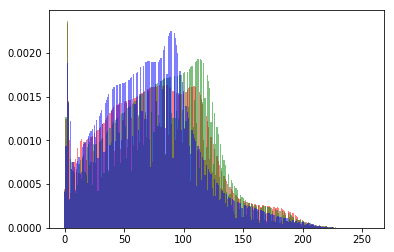

In [16]:
plot_histogram(trainval_satellite_images[:4])

In [17]:
def get_shapes(collection):
    for image_item in collection:
        print("{} - {}".format(image_item.image_id, image_item.shape))

In [18]:
get_shapes(trainval_satellite_images)

USGS_ATL - (7852, 6689, 3)
USGS_AUS - (7628, 6722, 3)
USGS_BHM - (7544, 6416, 3)
USGS_BOS - (7636, 6128, 3)
USGS_BWI - (8302, 6408, 3)
USGS_CLT - (7534, 6291, 3)
USGS_CVG - (7677, 6190, 3)
USGS_DSM - (8282, 6501, 3)
USGS_EYW - (7679, 6572, 3)
USGS_FAT - (4900, 5414, 3)
USGS_FLG - (4940, 4141, 3)
USGS_FLL - (7917, 6416, 3)
USGS_FWA - (7710, 6820, 3)
USGS_IAD - (7564, 6896, 3)
USGS_IAH - (7676, 6800, 3)
USGS_IND - (7581, 5868, 3)
USGS_MDW - (7585, 5853, 3)
USGS_MIA - (2377, 5669, 3)
USGS_OAK - (7898, 6357, 3)
USGS_OHR - (7596, 5854, 3)
USGS_PHX - (7620, 6510, 3)
USGS_SAN - (7590, 6000, 3)
USGS_SEA - (7620, 5410, 3)
USGS_SFO - (7885, 6357, 3)
USGS_SJC - (7556, 6905, 3)


## Some data viz

In [19]:
%matplotlib notebook

In [20]:
import khumeia.visualisation
from matplotlib import pyplot as plt

In [21]:
item = trainval_satellite_images[2]
print(item)
image = item.image
labels = item.labels

--- Item description ---
image_id: USGS_BHM
image_file: /home/fchouteau/repositories/tp_isae/data/raw/trainval/USGS_BHM.jpg
label_file: /home/fchouteau/repositories/tp_isae/data/raw/trainval/USGS_BHM.json
image_shape: (7544, 6416, 3)
number of labels: 10



<IPython.core.display.Javascript object>


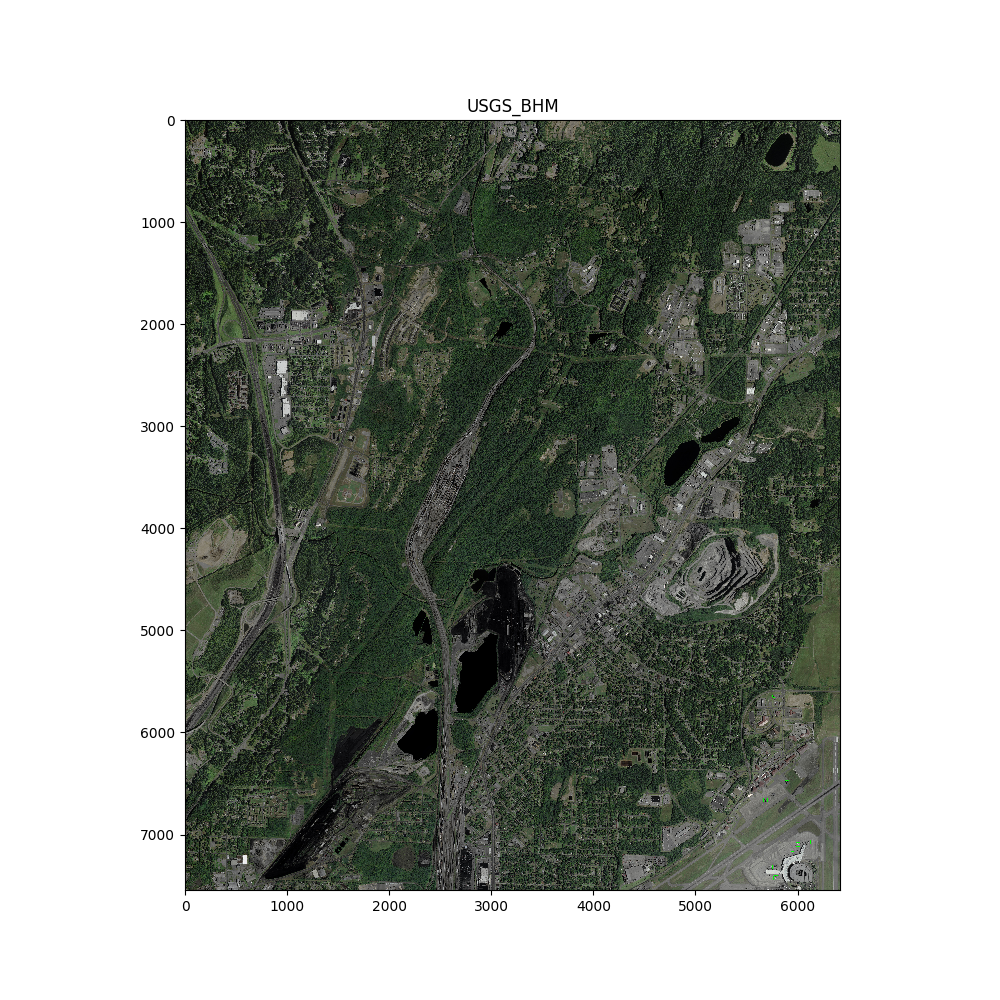

In [22]:
image = khumeia.visualisation.draw_bboxes_on_image(image, labels, color=(0, 255, 0))
plt.figure(figsize=(10,10))
plt.title(item.image_id)
plt.imshow(image)
plt.show()